# Process Observation Data Analysis
## The aim of this analysis is to experiment with an alternative approach to analyzing process data that could potentially be more time efficient.

The data structure for the data can be seen in the image below. The observations performed vary in the level of completness as some have been observed more than others, while some have not been observed at all. And for some the sample size is large enough and variance low enough to give confidence that an average is representative of the sample.

![ERD Image](../Data/ERD.jpg)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import seaborn as sns

In [4]:
data_folder = '../Data'
full_path = os.path.join(data_folder, 'ProcessData.xlsx')
excel_file_obj = pd.ExcelFile(full_path)
print('The names of the tabs or sheets in the excel file are as follows: ' ,excel_file_obj.sheet_names)

The names of the tabs or sheets in the excel file are as follows:  ['Iteration 1 Data (2)', 'Iteration 1 Data', 'Iteration 2 Tasks', 'Iteration 2 Session', 'DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']


From the list of sheets above it is clear that there are some additional unwanted sheets. Upon investigation it looks like the other sheets are templates that were imporoperly deleted and out of best practice we will not be dedicating resources to parsing them.

In [8]:
sheets_to_import = ['DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']
select_sheets = pd.read_excel(full_path, sheet_name=sheets_to_import)

In [9]:
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
63,64,62,5121100.0,01:03:42,01:05:04,0 days 00:01:22
26,27,20,5122100.0,01:22:56,01:22:58,0 days 00:00:02
379,380,200,43122500.0,00:13:57,00:14:05,0 days 00:00:08
300,301,80,5213800.0,01:29:25,01:29:35,0 days 00:00:10
361,362,200,43122200.0,00:02:06,00:02:08,0 days 00:00:02
161,162,71,5121100.0,01:45:31,01:46:29,0 days 00:00:58
111,112,61,5121200.0,03:02:50,03:02:57,0 days 00:00:07
166,167,71,5121100.0,01:52:32,01:53:47,0 days 00:01:15
505,507,30,5371600.0,01:14:10,01:14:17,0 days 00:00:07
253,254,71,521200.0,02:30:23,02:31:19,0 days 00:00:56


For the DurationData table:
1. The TaskID needs to be fixed and the .0 needs to be removed
2. The Duration needs to be fixed, and the days need to be removed, or recalculate the Duration

In [13]:
select_sheets['DurationData']['TaskID'] = select_sheets['DurationData']['TaskID'].fillna(0).replace([float('inf'), float('-inf')], 0).astype(int)
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
93,94,61,5122500,01:04:59,01:05:32,0 days 00:00:33
87,88,91,5121400,01:53:39,01:53:51,0 days 00:00:12
346,347,180,5385100,01:20:04,01:23:37,0 days 00:03:33
332,333,80,532100,03:39:32,03:41:58,0 days 00:02:26
85,86,91,5121500,01:07:20,01:07:47,0 days 00:00:27
258,259,90,521300,02:00:21,02:06:03,0 days 00:05:42
148,149,71,5122500,00:25:20,0:27:20,0 days 00:02:00
164,165,71,5122400,01:47:15,01:51:46,0 days 00:04:31
456,458,130,413200,01:42:50,01:51:55,0 days 00:09:05
384,385,190,45500,00:06:20,00:06:58,0 days 00:00:38


In [15]:
from datetime import datetime

In [17]:
select_sheets['DurationData']['StartTime'] = pd.to_datetime(select_sheets['DurationData']['StartTime'], format = '%H:%M:%S')
select_sheets['DurationData']['EndTime'] = pd.to_datetime(select_sheets['DurationData']['EndTime'], format = '%H:%M:%S')

select_sheets['DurationData'].loc[:,'Duration 2'] = select_sheets['DurationData']['EndTime'] - select_sheets['DurationData']['StartTime']

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2
424,426,130,413200,1900-01-01 00:40:46,1900-01-01 00:42:01,0 days 00:01:15,0 days 00:01:15
207,208,90,5122200,1900-01-01 02:00:21,1900-01-01 02:00:24,0 days 00:00:03,0 days 00:00:03
278,279,80,5122500,1900-01-01 00:30:06,1900-01-01 00:30:15,0 days 00:00:09,0 days 00:00:09
458,460,130,413200,1900-01-01 01:54:29,1900-01-01 01:55:39,0 days 00:01:10,0 days 00:01:10
226,227,10,5213800,1900-01-01 00:42:11,1900-01-01 00:42:11,0 days 00:00:00,0 days 00:00:00
352,353,140,5371300,1900-01-01 00:03:53,1900-01-01 00:04:34,0 days 00:00:41,0 days 00:00:41
192,193,50,5122100,1900-01-01 03:34:54,1900-01-01 03:35:33,0 days 00:00:39,0 days 00:00:39
12,13,11,5121500,1900-01-01 00:06:18,1900-01-01 00:07:36,0 days 00:01:18,0 days 00:01:18
344,345,180,5372100,1900-01-01 01:07:54,1900-01-01 01:09:36,0 days 00:01:42,0 days 00:01:42
490,492,30,5372100,1900-01-01 00:01:03,1900-01-01 00:05:27,0 days 00:04:24,0 days 00:04:24


In [19]:
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

select_sheets['DurationData'].loc[:,'Duration 3'] = select_sheets['DurationData']['Duration 2'].apply(format_timedelta)

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
445,447,130,413200,1900-01-01 01:21:40,1900-01-01 01:23:13,0 days 00:01:33,0 days 00:01:33,00:01:33
394,395,210,4313500,1900-01-01 00:09:56,1900-01-01 00:10:13,0 days 00:00:17,0 days 00:00:17,00:00:17
77,78,91,5121100,1900-01-01 01:01:27,1900-01-01 01:02:27,0 days 00:01:00,0 days 00:01:00,00:01:00
482,484,130,413100,1900-01-01 02:43:30,1900-01-01 02:44:25,0 days 00:00:55,0 days 00:00:55,00:00:55
149,150,71,5123100,1900-01-01 00:27:35,1900-01-01 00:28:27,0 days 00:00:52,0 days 00:00:52,00:00:52
143,144,41,511500,1900-01-01 00:34:14,1900-01-01 00:42:08,0 days 00:07:54,0 days 00:07:54,00:07:54
44,45,20,5122400,1900-01-01 02:25:42,1900-01-01 02:26:00,0 days 00:00:18,0 days 00:00:18,00:00:18
481,483,130,413200,1900-01-01 02:42:03,1900-01-01 02:43:02,0 days 00:00:59,0 days 00:00:59,00:00:59
115,116,61,5122200,1900-01-01 03:39:45,1900-01-01 03:39:56,0 days 00:00:11,0 days 00:00:11,00:00:11
267,268,81,5322200,1900-01-01 00:08:10,1900-01-01 00:17:02,0 days 00:08:52,0 days 00:08:52,00:08:52


To get the Duration in the right format we had to:
1. Convert the start and end time to datetime (datetime.datetime)
2. Calculate the difference (timedelta object)
3. Convert the start and end time to datetime.time to remove the year
4. Format the timedelta to remove the day count

In [22]:
select_sheets['DurationData']['StartTime'] = select_sheets['DurationData']['StartTime'].dt.time
select_sheets['DurationData']['EndTime'] = select_sheets['DurationData']['EndTime'].dt.time
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
217,218,90,5121100,03:29:35,03:29:43,0 days 00:00:08,0 days 00:00:08,00:00:08
210,211,90,5123300,02:00:49,02:05:54,0 days 00:05:05,0 days 00:05:05,00:05:05
503,505,30,5122500,01:12:31,01:12:44,0 days 00:00:13,0 days 00:00:13,00:00:13
395,396,210,4313100,00:10:36,00:12:09,0 days 00:01:33,0 days 00:01:33,00:01:33
35,36,20,5122500,02:06:48,02:08:10,0 days 00:01:22,0 days 00:01:22,00:01:22
229,230,20,5223800,00:28:44,00:29:02,0 days 00:00:18,0 days 00:00:18,00:00:18
386,387,190,45500,00:07:58,00:08:16,0 days 00:00:18,0 days 00:00:18,00:00:18
102,103,61,5122300,01:39:48,01:39:49,0 days 00:00:01,0 days 00:00:01,00:00:01
215,216,90,5123400,02:24:45,02:28:13,0 days 00:03:28,0 days 00:03:28,00:03:28
169,170,71,5122400,01:54:51,01:56:01,0 days 00:01:10,0 days 00:01:10,00:01:10


In [24]:
display(select_sheets['TaskData'].sample(n=10))

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
240,4314200,Send email confirmation showing ACB file upload,4314,Finance Team,0,NaN
11,5121400,Capture call related to info (member / dependent),512,Pre-authorization Agent,28,00:00:19.464000
172,5371700,Issue correspondence,5371,Case Manager,3,00:00:00
225,538421000,Update authorisation status,53842,Case Manager,0,NaN
151,52231300,Check RPL codes on Medcode link,522,Pre-authorization Agent,0,NaN
189,5383400,Assess case for clinical appropriateness for e...,5383,Case manager,0,NaN
215,538411200,Issue correspondence,53841,Case manager,0,NaN
108,5213100,Select Apply,521,Pre-authorization Agent,0,NaN
116,5213900,Request hospital updates,521,Pre-authorization Agent,0,NaN
249,522200,Validate membership,522,Pre-authorization Agent,3,00:00:23.333000


For the TaskData table:
1. We need to know up front how many processes we actually observed, then remove all processes that were not observed at least once
2. We need to know the number of iterations observed for each task, as well as how many people were observed. (Group and individualized views)
3. We need all measures of central tendency and either a box plot or scatter plot to get an idea of how times are distributed for each TaskID.
4. Find a relationship between number of iterations or people observed, and how data is distributed (looking at the mean as a proportion of the standard deviation)

In [27]:
display(select_sheets['RecordingData'])

,RecordingID,Recording Length,RecordingDate,PersonObserved,RecordingStatus
0,10.0,00:46:42,28/08/2024,Pauline Jordaan,Processed and Reviewed
1,11.0,00:29:04,28/08/2024,Pauline Jordaan,Processed and Reviewed
2,20.0,03:21:07,28/08/2024,Siyethemba Mkhize,Processed and Reviewed
3,30.0,03:03:36,29/08/2024,Jaqueline Wessels,Processed and Reviewed
4,40.0,00:42:28,02/09/2024,Zoleka Baba,Processed and Reviewed
...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN


For the RecordingData table:
1. The data type for Recording ID needs to be fixed
2. The extra rows need to be removed

In [30]:
print(select_sheets['TaskData'].dtypes)

TaskID              int64
TaskName           object
ProcessID           int64
ResponsibleRole    object
Iterations          int64
AverageTaskTime    object
dtype: object


In [32]:
observedProcesses = select_sheets['TaskData'][select_sheets['TaskData']['Iterations'] > 0]
percentage0bserved = (observedProcesses.shape[0] / select_sheets['TaskData'].shape[0]) * 100
print(f"Out of {select_sheets['TaskData'].shape[0]} total tasks {observedProcesses.shape[0]} have been observed at least once making this {percentage0bserved}%")

Out of 251 total tasks 81 have been observed at least once making this 32.27091633466135%


In [34]:
groupedIterations = select_sheets['TaskData'].groupby('Iterations').size()
dfGroupedIterations = groupedIterations.reset_index(name='Number of Tasks')
display(dfGroupedIterations)

,Iterations,Number of Tasks
0,0,170
1,1,29
2,2,8
3,3,9
4,4,12
5,5,3
6,6,2
7,7,1
8,9,4
9,10,2


In [36]:
print(dfGroupedIterations.dtypes)

Iterations         int64
Number of Tasks    int64
dtype: object


In [38]:
def categorizeNoTasks(x):
    if x==0:
        return '0'
    elif x==1:
        return '1'
    elif x>1 and x<=5:
        return '2-5'
    elif x>5 and x<=15:
        return '6-15'
    else:
        return '15+'

dfGroupedIterations.loc[:,'Categorized Task Count'] = dfGroupedIterations['Iterations'].apply(categorizeNoTasks)

display(dfGroupedIterations)

groupedIterationTasks = dfGroupedIterations.groupby('Categorized Task Count')['Number of Tasks'].sum().reset_index()

display(groupedIterationTasks)

,Iterations,Number of Tasks,Categorized Task Count
0,0,170,0
1,1,29,1
2,2,8,2-5
3,3,9,2-5
4,4,12,2-5
5,5,3,2-5
6,6,2,6-15
7,7,1,6-15
8,9,4,6-15
9,10,2,6-15


,Categorized Task Count,Number of Tasks
0,0,170
1,1,29
2,15+,8
3,2-5,32
4,6-15,12


In [40]:
print(groupedIterationTasks.dtypes)

Categorized Task Count    object
Number of Tasks            int64
dtype: object


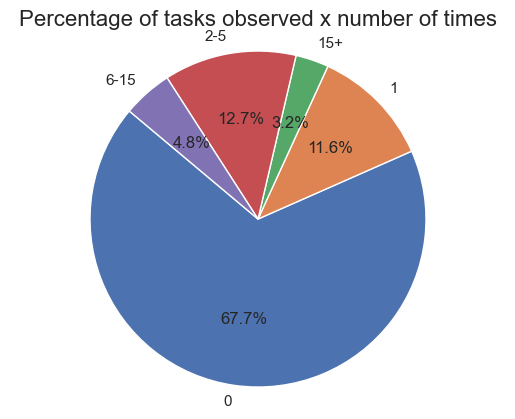

In [42]:
sns.set()

plt.pie(groupedIterationTasks['Number of Tasks'], labels=groupedIterationTasks['Categorized Task Count'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of tasks observed x number of times', fontsize=16)
plt.savefig('../Exports/PercentageTasksXIterations-PieChart.png', format='png', dpi=300)
plt.show()

The chart above makes it clear just how many processes are yet to be observed, and thus quantified. Depending on the threshold set for a task being adequately observed.

In [45]:
display(select_sheets['TaskData'].sample(n=25))

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
138,522200,Validate membership,522,Case manager,3,00:00:23.333000
69,5371400,Capture auth notes,5371,Case Manager,0,NaN
81,4151000,Review claim amount,415,Client services TL,0,NaN
64,5324400,Issue weekly report via email,5324,Case manager,0,NaN
136,522100,Validate authorisation request,522,Pre-authorization Agent,0,NaN
77,415600,Manage stale claim resubmission,415,Claims Query Resolution,0,NaN
246,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000
207,53841400,Request supporting documentation,53841,Case manager,0,NaN
204,53841100,Load request,53841,Case manager,0,NaN
248,522100,Validate authorisation request,522,Pre-authorization Agent,0,NaN


In [47]:
print(select_sheets['DurationData'].dtypes)

DurationID               int64
RecordingID              int64
TaskID                   int32
StartTime               object
EndTime                 object
Duration       timedelta64[ns]
Duration 2     timedelta64[ns]
Duration 3              object
dtype: object


In [49]:
display(select_sheets['DurationData'].sample(n=25))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
512,514,30,5122500,01:31:45,01:32:57,0 days 00:01:12,0 days 00:01:12,00:01:12
352,353,140,5371300,00:03:53,00:04:34,0 days 00:00:41,0 days 00:00:41,00:00:41
63,64,62,5121100,01:03:42,01:05:04,0 days 00:01:22,0 days 00:01:22,00:01:22
121,122,51,511200,01:01:57,01:05:10,0 days 00:03:13,0 days 00:03:13,00:03:13
300,301,80,5213800,01:29:25,01:29:35,0 days 00:00:10,0 days 00:00:10,00:00:10
326,327,80,521600,03:36:29,03:36:39,0 days 00:00:10,0 days 00:00:10,00:00:10
448,450,130,413100,01:28:33,01:29:49,0 days 00:01:16,0 days 00:01:16,00:01:16
350,351,140,5371100,00:01:15,00:03:16,0 days 00:02:01,0 days 00:02:01,00:02:01
48,49,20,5121100,02:33:42,02:34:00,0 days 00:00:18,0 days 00:00:18,00:00:18
416,418,130,413100,00:13:55,00:15:00,0 days 00:01:05,0 days 00:01:05,00:01:05


A few things need to be done for the duration data:
1. The required duration data need to be stored in a new dataframe
2. The duration needs to be converted to timedelta to make future operations possible

Then for the task data:
1. All times with more than 1 iterations need to be selected into a new dataframe
2. Then all measures of central tendency need to be calculated for these task durations
3. Then box plots for these tasks

In [60]:
durationData = select_sheets['DurationData'][['RecordingID','TaskID','Duration 3']]
display(durationData)

,RecordingID,TaskID,Duration 3
0,10,5121100,00:00:20
1,10,5121200,00:00:16
2,10,5121400,00:00:55
3,10,5122100,00:00:18
4,10,5122200,00:00:15
...,...,...,...
520,30,5371600,00:00:06
521,30,5381200,00:01:48
522,30,5381300,00:08:06
523,30,53841700,00:06:32


In [62]:
durationData.loc[:,'Duration 3'] = pd.to_timedelta(durationData['Duration 3'])
display(durationData)

,RecordingID,TaskID,Duration 3
0,10,5121100,0 days 00:00:20
1,10,5121200,0 days 00:00:16
2,10,5121400,0 days 00:00:55
3,10,5122100,0 days 00:00:18
4,10,5122200,0 days 00:00:15
...,...,...,...
520,30,5371600,0 days 00:00:06
521,30,5381200,0 days 00:01:48
522,30,5381300,0 days 00:08:06
523,30,53841700,0 days 00:06:32


In [66]:
taskData = select_sheets['TaskData'][select_sheets['TaskData']['Iterations'] > 1]
display(taskData)

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
3,511400,Perform mock claims and apply claiming rules,511,Claims Technical Specialist,4,00:11:41.500000
4,511500,Email excel quote,511,Claims Technical Specialist,4,00:05:38.250000
8,5121100,Capture member number on call center enquiries...,512,Pre-authorization Agent,37,00:00:28.459000
9,5121200,Review consent form and dependent's ID number,512,Pre-authorization Agent,4,00:00:16.750000
11,5121400,Capture call related to info (member / dependent),512,Pre-authorization Agent,28,00:00:19.464000
12,5121500,Resolve enquiry,512,Pre-authorization Agent,34,00:01:31.735000
13,5122100,Capture and validate member number,512,Pre-authorization Agent,22,00:00:34.955000
14,5122200,Select the required dependent,512,Pre-authorization Agent,11,00:00:52.545000
15,5122300,Select Create,512,Pre-authorization Agent,12,00:00:24.667000
16,5122400,Capture auth details and click OK,512,Pre-authorization Agent,19,00:01:30.211000


In [68]:
durationData.rename(columns={'Duration 3': 'Duration'}, inplace=True)
display(durationData)

C:\Users\User\AppData\Local\Temp\ipykernel_18780\1285653903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durationData.rename(columns={'Duration 3': 'Duration'}, inplace=True)


,RecordingID,TaskID,Duration
0,10,5121100,0 days 00:00:20
1,10,5121200,0 days 00:00:16
2,10,5121400,0 days 00:00:55
3,10,5122100,0 days 00:00:18
4,10,5122200,0 days 00:00:15
...,...,...,...
520,30,5371600,0 days 00:00:06
521,30,5381200,0 days 00:01:48
522,30,5381300,0 days 00:08:06
523,30,53841700,0 days 00:06:32


In [74]:
durationStats = durationData.groupby('TaskID')['Duration'].agg(['mean', 'min', 'max', 'std','median']).reset_index()
display(durationStats)

TypeError: float() argument must be a string or a real number, not 'Timedelta'

Since the above doesn't work, we'll have to convert the duration to seconds and back. 